In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
%cd drive/MyDrive/Github/TP_MACHINE_LEARNING

/content/drive/MyDrive/Github/TP_MACHINE_LEARNING


# NEURAL NETWORKS

# FROM DIVIDING LINES TO NEURAL NETWORKS

LINE SEPARATION

In [4]:
import matplotlib.pyplot as plt
import numpy as np


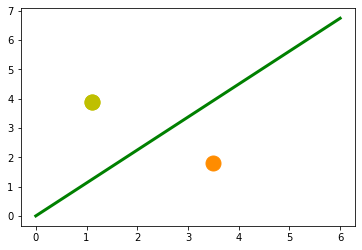

In [5]:
X = np.arange(0, 7)
fig, ax = plt.subplots()

ax.plot(3.5, 1.8, "or",
        color="darkorange",
        markersize=15)
ax.plot(1.1, 3.9, "oy",
        markersize=15)
point_on_line = (4, 4.5)
ax.plot(1.1, 3.9, "oy", markersize=15)
# calculate gradient:
m = point_on_line[1] / point_on_line[0]
ax.plot(X, m * X, "g-", linewidth=3)
plt.show()


In [6]:
#Verification des semis plans auquelles appartienent les points : lemon et orange
lemon = (1.1, 3.9)
orange = (3.5, 1.8)
m = 4.5 / 4
# check if orange is below the line,
# positive value is expected:
print(orange[0] * m - orange[1])
# check if lemon is above the line,
# negative value is expected:
print(lemon[0] * m - lemon[1])

2.1375
-2.6624999999999996


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Cette fonction crait une autre fonction de calcule 
# de distance d'un point par rapport à une droite  
def create_distance_function(a, b, c):
    """ 0 = ax + by + c """
    def distance(x, y):
        """
        returns tuple (d, pos)
        d is the distance
        If pos == -1 point is below the line,
        0 on the line and +1 if above the line
        """
        nom = a * x + b * y + c
        if nom == 0:
            pos = 0
        elif (nom<0 and b<0) or (nom>0 and b>0):
            pos = -1
        else:
            pos = 1
        return (np.absolute(nom) / np.sqrt( a ** 2 + b ** 2), pos)
    return distance


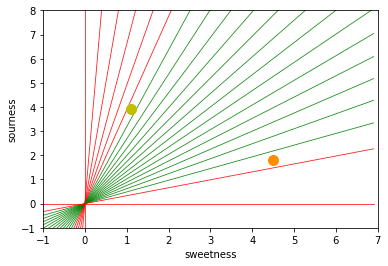

In [8]:
orange = (4.5, 1.8)
lemon = (1.1, 3.9)
fruits_coords = [orange, lemon]
fig, ax = plt.subplots()
ax.set_xlabel("sweetness")
ax.set_ylabel("sourness")
x_min, x_max = -1, 7
y_min, y_max = -1, 8
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
X = np.arange(x_min, x_max, 0.1)
step = 0.05
for x in np.arange(0, 1+step, step):
    slope = np.tan(np.arccos(x))
    dist4line1 = create_distance_function(slope, -1, 0)
    Y = slope * X
    results = []
    for point in fruits_coords:
        results.append(dist4line1(*point))
    if (results[0][1] != results[1][1]):
        ax.plot(X, Y, "g-", linewidth=0.8, alpha=0.9)
    else:
        ax.plot(X, Y, "r-", linewidth=0.8, alpha=0.9)

size = 10
for (index, (x, y)) in enumerate(fruits_coords):
    if index== 0:
        ax.plot(x, y, "o",
                color="darkorange",
                markersize=size)
    else:
        ax.plot(x, y, "oy",
                markersize=size)
plt.show()


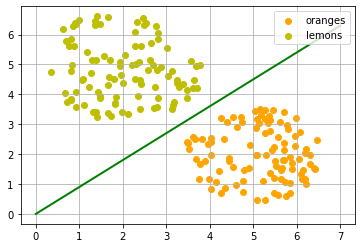

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def points_within_circle(radius,
                         center=(0, 0),
                         number_of_points=100):
    center_x, center_y = center
    r = radius * np.sqrt(np.random.random((number_of_points,)))
    theta = np.random.random((number_of_points,)) * 2 * np.pi
    x = center_x + r * np.cos(theta)
    y = center_y + r * np.sin(theta)
    return x, y

X = np.arange(0, 8)
fig, ax = plt.subplots()
oranges_x, oranges_y = points_within_circle(1.6, (5, 2), 100)
lemons_x, lemons_y = points_within_circle(1.9, (2, 5), 100)

ax.scatter(oranges_x,
           oranges_y,
           c="orange",
           label="oranges")
ax.scatter(lemons_x,
           lemons_y,
           c="y",
           label="lemons")
ax.plot(X, 0.9 * X, "g-", linewidth=2)
ax.legend()
ax.grid()
plt.show()


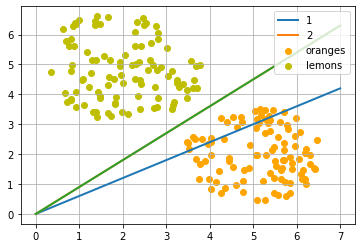

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import repeat
from random import shuffle
X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x,
           oranges_y,
           c="orange",
           label="oranges")
ax.scatter(lemons_x,
           lemons_y,
           c="y",
           label="lemons")
fruits = list(zip(oranges_x,
                  oranges_y,
                  repeat(0, len(oranges_x))))
fruits += list(zip(lemons_x,
                   lemons_y,
                   repeat(1, len(oranges_x))))
shuffle(fruits)

def adjust(learning_rate=0.3, slope=0.3):
    line = None
    counter = 0
    for x, y, label in fruits:
        res = slope * x - y
        #print(label, res)
        if label == 0 and res < 0:
            # point is above line but should be below
            # => increment slope
            slope += learning_rate
            counter += 1
            ax.plot(X, slope * X,
                    linewidth=2, label=str(counter))
        elif label == 1 and res > 0:
            # point is below line but should be above
            # => decrement slope
            #print(res, label)
            slope -= learning_rate
            counter += 1
            ax.plot(X, slope * X,
                    linewidth=2, label=str(counter))
    return slope

slope = adjust()
ax.plot(X,
slope * X,
linewidth=2)
ax.legend()
ax.grid()
plt.show()


In [ ]:
print(slope)

0.8999999999999999


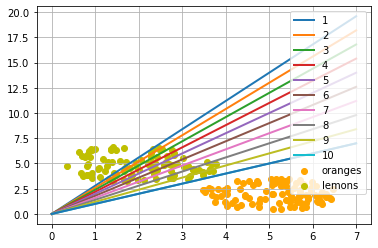

0.9999999999999996


In [11]:
X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x,
           oranges_y,
           c="orange",
           label="oranges")
ax.scatter(lemons_x,
           lemons_y,
           c="y",
           label="lemons")
slope = adjust(learning_rate=0.2, slope=3)
ax.plot(X,
        slope * X,
        linewidth=2)
ax.legend()
ax.grid()
plt.show()
print(slope)


In [12]:
import numpy as np

class Perceptron:
    def __init__(self, weights):
        """
        'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
        self.weights = np.array(weights)
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return weighted_sum

p = Perceptron(weights=[-0.45, 0.5])

for point in zip(oranges_x[:10], oranges_y[:10]):
    res = p(point)
    print(res, end=", ")

for point in zip(lemons_x[:10], lemons_y[:10]):
    res = p(point)
    print(res, end=", ")


-0.8182292869720842, -1.382361302745692, -2.0358242847711074, -0.8328886253663095, -1.118882274818619, -0.7413641567111833, -1.076495283509018, -1.809571605176765, -0.3551344285156146, -1.1011198657005763, 0.443842205995312, 0.6454222453393299, 1.3135307627941888, 0.6705314880279689, 2.6230972895158184, 0.40090956677824496, 1.3036055423808335, 1.236909705416248, 2.545398588017221, 1.6773554270229645, 

A SIMPLE NEURAL NETWORK

In [13]:
from collections import Counter

evaluation = Counter()
for point in zip(oranges_x, oranges_y):
    res = p(point)
    if res < 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1

for point in zip(lemons_x, lemons_y):
    res = p(point)
    if res >= 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1

print(evaluation)


Counter({'corrects': 200})


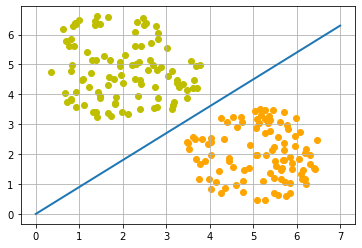

0.9


In [14]:
import time
import matplotlib.pyplot as plt
slope = 0.1

X = np.arange(0, 8)

fig, ax = plt.subplots()
ax.scatter(oranges_x,
           oranges_y,
           c="orange",
           label="oranges")
ax.scatter(lemons_x,
           lemons_y,
           c="y",
           label="lemons")

slope = 0.45 / 0.5
ax.plot(X, slope * X,
        linewidth=2)

ax.grid()
plt.show()

print(slope)


TRAINING A NEURAL NETWORK

In [15]:
from sklearn.model_selection import train_test_split
import random

oranges = list(zip(oranges_x, oranges_y))
lemons = list(zip(lemons_x, lemons_y))
# labelling oranges with 0 and lemons with 1:
labelled_data = list(zip(oranges + lemons,
                         [0] * len(oranges) + [1] * len(lemons)))
random.shuffle(labelled_data)
data, labels = zip(*labelled_data)
res = train_test_split(data, labels,
                       train_size=0.8,
                       test_size=0.2,
                       random_state=42)
train_data, test_data, train_labels, test_labels = res
print(train_data[:10], train_labels[:10])


[(5.853820292650615, 1.9152304055888265), (1.5662060974539034, 5.280059426972427), (1.2269715738120062, 4.256177564942538), (5.394518277925393, 3.1291811556767595), (2.63369067060466, 5.154167262631701), (5.454956676135761, 3.4823003594101065), (1.806862453171487, 4.530135810197869), (4.770815060532396, 0.7239154096517013), (3.678728014052928, 1.828126899225269), (1.2736405181137098, 4.721261595564402)] [0, 1, 1, 0, 1, 0, 1, 0, 0, 1]


In [16]:
import numpy as np
from collections import Counter

class Perceptron:
    def __init__(self,
        weights,
        learning_rate=0.1):
        """
        'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
        self.weights = np.array(weights)
        self.learning_rate = learning_rate
    
    @staticmethod
    def unit_step_function(x):
        if x < 0:
            return 0
        else:
            return 1
    
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        #print(in_data, weighted_input, weighted_sum)
        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self,
               target_result,
               calculated_result,
               in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data) #
        error = target_result - calculated_result
        if error != 0:
            correction = error * in_data * self.learning_rate
            self.weights += correction
            #print(target_result, calculated_result, error, in_data, correction, self.weights)
    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(p(data[index]),0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation

p = Perceptron(weights=[0.1, 0.1],
               learning_rate=0.3)

for index in range(len(train_data)):
    p.adjust(train_labels[index],
             p(train_data[index]),
             train_data[index])
    
evaluation = p.evaluate(train_data, train_labels)
print(evaluation.most_common())
evaluation = p.evaluate(test_data, test_labels)
print(evaluation.most_common())
print(p.weights)


[('correct', 160)]
[('correct', 40)]
[-1.18628426  1.10944871]


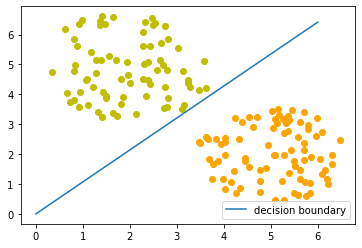

[-1.18628426  1.10944871]


In [17]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(0, 7)
fig, ax = plt.subplots()
lemons = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 1]
lemons_x, lemons_y = zip(*lemons)

oranges = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 0]
oranges_x, oranges_y = zip(*oranges)
ax.scatter(oranges_x, oranges_y, c="orange")
ax.scatter(lemons_x, lemons_y, c="y")
w1 = p.weights[0]
w2 = p.weights[1]
m = -w1 / w2
ax.plot(X, m * X, label="decision boundary")
ax.legend()
plt.show()
print(p.weights)

0 -3.4897889730879172 [-1.65614609 -0.47456912] (5.853820292650615, 1.9152304055888265)
1 1.0692556147027374 [-1.18628426  1.10944871] (1.5662060974539034, 5.280059426972427)


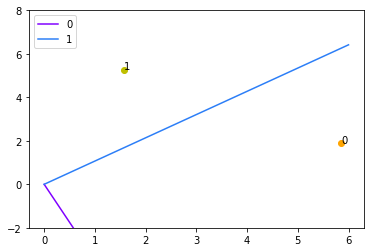

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

p = Perceptron(weights=[0.1, 0.1],
               learning_rate=0.3)
number_of_colors = 7
colors = cm.rainbow(np.linspace(0, 1, number_of_colors))

fig, ax = plt.subplots()
ax.set_xticks(range(8))
ax.set_ylim([-2, 8])
counter = 0

for index in range(len(train_data)):
    old_weights = p.weights.copy()
    p.adjust(train_labels[index],
             p(train_data[index]),
             train_data[index])
    if not np.array_equal(old_weights, p.weights):
        color = "orange" if train_labels[index] == 0 else "y"
        ax.scatter(train_data[index][0],
                   train_data[index][1],
                   color=color)
        ax.annotate(str(counter),
                    (train_data[index][0], 
                     train_data[index][1]))
        m = -p.weights[0] / p.weights[1]
        print(index, m, p.weights, train_data[index])
        ax.plot(X, m * X, label=str(counter), color=colors[counter])
        counter += 1
ax.legend()
plt.show()

# SIMPLE NEURAL NETWORKS

### LINEARLY SEPARABLE DATA SETS

PERCEPTRON FOR THE AND FUNCTION

[]

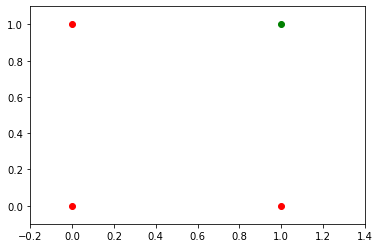

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1
#ax.plot(X, m * X + 1.2, label="decision boundary")
plt.plot()

[]

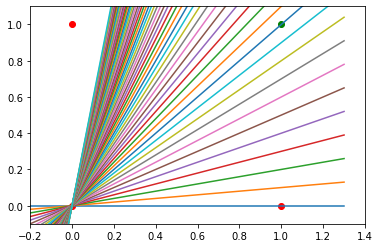

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1

for m in np.arange(0, 6, 0.1):
    ax.plot(X, m * X )
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
plt.plot()


[]

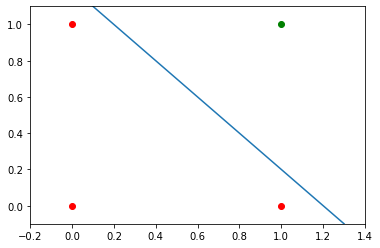

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m, c = -1, 1.2
ax.plot(X, m * X + c )
plt.plot()


SINGLE PERCEPTRON WITH A BIAS

In [ ]:
import numpy as np
from perceptrons import Perceptron

def labelled_samples(n):
    for _ in range(n):
        s = np.random.randint(0, 2, (2,))
        yield (s, 1) if s[0] == 1 and s[1] == 1 else (s, 0)

p = Perceptron(weights=[0.3, 0.3, 0.3],
               learning_rate=0.2)
for in_data, label in labelled_samples(30):
    p.adjust(label, in_data)

test_data, test_labels = list(zip(*labelled_samples(30)))
evaluation = p.evaluate(test_data, test_labels)
print(evaluation)


Counter({'correct': 30})


-0.33333333333333326 1.0000000000000002


[]

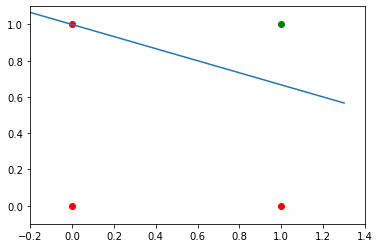

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]
print(m, c)
ax.plot(X, m * X + c )
plt.plot()


In [ ]:
from sklearn.datasets import make_blobs

n_samples = 250
samples, labels = make_blobs(n_samples=n_samples,
                             centers=([2.5, 3], [6.7, 7.9]),
                             random_state=0)


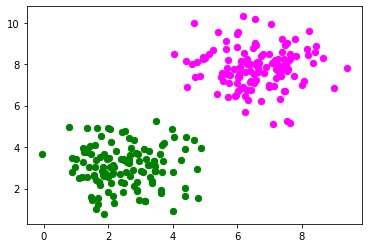

In [ ]:
import matplotlib.pyplot as plt

colours = ('green', 'magenta', 'blue', 'cyan', 'yellow', 'red')
fig, ax = plt.subplots()

for n_class in range(2):
    ax.scatter(samples[labels==n_class][:, 0], 
               samples[labels==n_class][:, 1],
               c=colours[n_class], s=40, label=str(n_class))
    

In [ ]:
n_learn_data = int(n_samples * 0.8) # 80 % of available data points

learn_data, test_data = samples[:n_learn_data], samples[-n_learn_data:]
learn_labels, test_labels = labels[:n_learn_data], labels[-n_learn_data:]

from perceptrons import Perceptron

p = Perceptron(weights=[0.3, 0.3, 0.3],
               learning_rate=0.8)
for sample, label in zip(learn_data, learn_labels):
    p.adjust(label,
             sample)
evaluation = p.evaluate(learn_data, learn_labels)
print(evaluation)


Counter({'correct': 200})


-1.5513529034664024 11.736643489707035


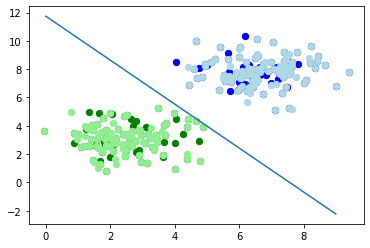

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# plotting learn data
colours = ('green', 'blue')

for n_class in range(2):
    ax.scatter(learn_data[learn_labels==n_class][:, 0],
               learn_data[learn_labels==n_class][:, 1],
               c=colours[n_class], s=40, label=str(n_class))

# plotting test data
colours = ('lightgreen', 'lightblue')
for n_class in range(2):
    ax.scatter(test_data[test_labels==n_class][:, 0],
               test_data[test_labels==n_class][:, 1],
               c=colours[n_class], s=40, label=str(n_class))

X = np.arange(np.max(samples[:,0]))
m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]
print(m, c)
ax.plot(X, m * X + c )
plt.plot()
plt.show()


### THE XOR PROBLEM FOR NEURAL NETWORK 

EXERCISES

EXERCISE 1 :

We could extend the logical AND to float values between 0 and 1 in the following way:

EXERCISE 2:

A point belongs to a class 0, if x 1 < 0.5 and belongs to class 1, if x 1 >= 0.5. Train a network with one
perceptron to classify arbitrary points. What can you say about the dicision boundary? What about the input
values x 2

SOLUTIONS TO THE EXERCISES

SOLUTION TO THE 1. EXERCISE

In [ ]:
from perceptrons import Perceptron

p = Perceptron(weights=[0.3, 0.3, 0.3],
               bias=1,
               learning_rate=0.2)
def labelled_samples(n):
    for _ in range(n):
        s = np.random.random((2,))
        yield (s, 1) if s[0] >= 0.5 and s[1] >= 0.5 else (s, 0)

for in_data, label in labelled_samples(30):
    p.adjust(label,in_data)

test_data, test_labels = list(zip(*labelled_samples(60)))
evaluation = p.evaluate(test_data, test_labels)
print(evaluation)


Counter({'correct': 49, 'wrong': 11})


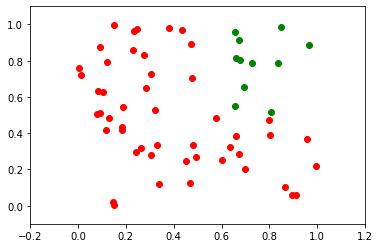

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


ones = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 1]
zeroes = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 0]

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.2
X, Y = list(zip(*ones))
ax.scatter(X, Y, color="g")
X, Y = list(zip(*zeroes))
ax.scatter(X, Y, color="r")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
c = -p.weights[2] / p.weights[1]
m = -p.weights[0] / p.weights[1]
X = np.arange(xmin, xmax, 0.1)
ax.plot(X, m * X + c, label="decision boundary")


SOLUTION TO THE 2ND EXERCISE

In [ ]:
from perceptrons import Perceptron

import numpy as np
from collections import Counter

def labelled_samples(n):
    for _ in range(n):
        s = np.random.random((2,))
        yield (s, 0) if s[0] < 0.5 else (s, 1)

p = Perceptron(weights=[0.3, 0.3, 0.3],
               learning_rate=0.4)

for in_data, label in labelled_samples(300):
    p.adjust(label,
             in_data)

test_data, test_labels = list(zip(*labelled_samples(500)))

print(p.weights)
p.evaluate(test_data, test_labels)


[ 2.0203996  -0.12925946 -0.9       ]


Counter({'correct': 487, 'wrong': 13})

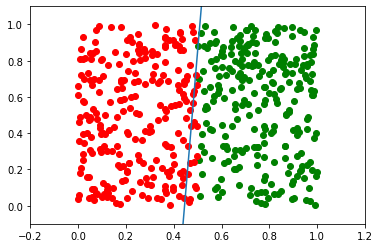

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ones = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 1]
zeroes = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 0]

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.2
X, Y = list(zip(*ones))
ax.scatter(X, Y, color="g")
X, Y = list(zip(*zeroes))
ax.scatter(X, Y, color="r")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
c = -p.weights[2] / p.weights[1]
m = -p.weights[0] / p.weights[1]
X = np.arange(xmin, xmax, 0.1)
ax.plot(X, m * X + c, label="decision boundary")

# NEURAL NETWORKS, STRUCTURE, WEIGHTS AND MATRICES

### INTRODUCTION

In [ ]:
import numpy as np

input_vector = np.array([2, 4, 11])
print(input_vector)

[ 2  4 11]


In [ ]:
import numpy as np
input_vector = np.array([2, 4, 11])
input_vector = np.array(input_vector, ndmin=2).T
print("The input vector:\n", input_vector)
print("The shape of this vector: ", input_vector.shape)

The input vector:
 [[ 2]
 [ 4]
 [11]]
The shape of this vector:  (3, 1)


### WEIGHTS AND MATRICES

### INITIALIZING THE WEIGHT MATRICES

In [ ]:
import numpy as np

number_of_samples = 1200
low = -1
high = 0
s = np.random.uniform(low, high, number_of_samples)
# all values of s are within the half open interval [-1, 0) :
print(np.all(s >= -1) and np.all(s < 0))

True


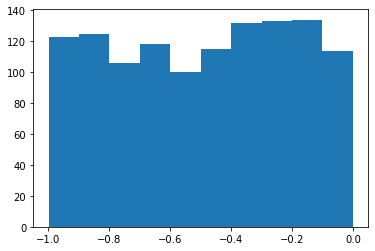

In [ ]:
import matplotlib.pyplot as plt
plt.hist(s)
plt.show()

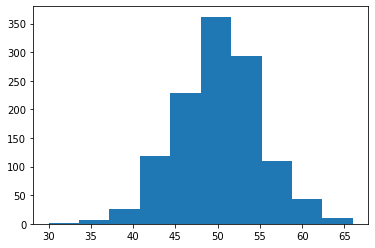

In [ ]:
s = np.random.binomial(100, 0.5, 1200)
plt.hist(s)
plt.show()

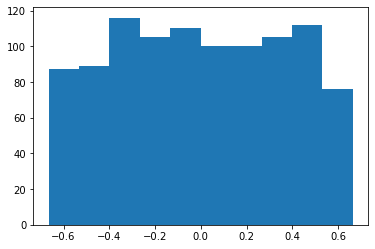

In [ ]:
from scipy.stats import truncnorm
s = truncnorm(a=-2/3., b=2/3., scale=1, loc=0).rvs(size=1000)
plt.hist(s)
plt.show()

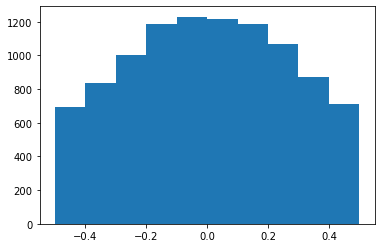

In [ ]:
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
X = truncated_normal(mean=0, sd=0.4, low=-0.5, upp=0.5)
s = X.rvs(10000)
plt.hist(s)
plt.show()

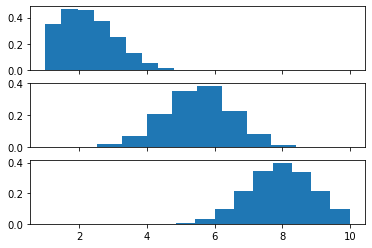

In [ ]:
X1 = truncated_normal(mean=2, sd=1, low=1, upp=10)
X2 = truncated_normal(mean=5.5, sd=1, low=1, upp=10)
X3 = truncated_normal(mean=8, sd=1, low=1, upp=10)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, sharex=True)
ax[0].hist(X1.rvs(10000), density=True)
ax[1].hist(X2.rvs(10000), density=True)
ax[2].hist(X3.rvs(10000), density=True)
plt.show()

In [ ]:
no_of_hidden_nodes = 4
no_of_output_nodes = 2
rad = 1 / np.sqrt(no_of_hidden_nodes) # this is the input in this layer!
X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
who = X.rvs((no_of_output_nodes, no_of_hidden_nodes))
who

array([[-4.81228160e-01,  3.99882138e-04, -2.03377414e-01,
        -3.00705606e-01],
       [ 9.55765977e-02, -1.47563674e-01,  1.06890363e-01,
         1.44558085e-01]])

# RUNNING A NEURAL NETWORK WITH PYTHON

### A NEURAL NETWORK CLASS

In [ ]:

import numpy as np
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

class NeuralNetwork:
    def __init__(self,
                 no_of_in_nodes,
                 no_of_out_nodes,
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,
                                        self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes,
                                         self.no_of_hidden_nodes))
    def train(self):
        pass
    
    def run(self):
        pass


In [ ]:
simple_network = NeuralNetwork(no_of_in_nodes = 3,
                               no_of_out_nodes = 2,
                               no_of_hidden_nodes = 4,
                               learning_rate = 0.1)
print(simple_network.weights_in_hidden)
print(simple_network.weights_hidden_out)


[[ 0.03655195 -0.06608608 -0.56083284]
 [-0.30536698  0.14869359  0.16867831]
 [ 0.1100692  -0.11028605 -0.55095061]
 [-0.19185979 -0.15341247 -0.4520172 ]]
[[-0.4769437  -0.24844585 -0.30218098  0.15646326]
 [ 0.48528311  0.13589575 -0.3608227  -0.3929369 ]]


### ACTIVATION FUNCTIONS, SIGMOID AND RELU

In /home/tsanga/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tsanga/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tsanga/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/tsanga/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tsanga/anaconda3/lib/python3.9/site-packages/matplo

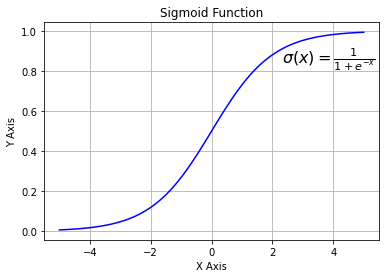

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigma(x):
    return 1 / (1 + np.exp(-x))

X = np.linspace(-5, 5, 100)
plt.plot(X, sigma(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')
plt.grid()

plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.show()


In [ ]:
from scipy.special import expit
print(expit(3.4))
print(expit([3, 4, 1]))
print(expit(np.array([0.8, 2.3, 8])))

0.9677045353015494
[0.95257413 0.98201379 0.73105858]
[0.68997448 0.90887704 0.99966465]


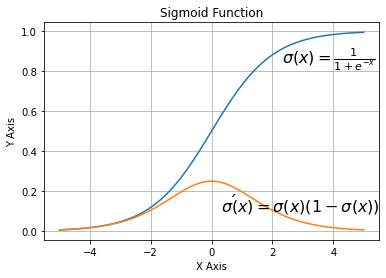

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigma(x):
    return 1 / (1 + np.exp(-x))

X = np.linspace(-5, 5, 100)
plt.plot(X, sigma(X))
plt.plot(X, sigma(X) * (1 - sigma(X)))
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')
plt.grid()
plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.text(0.3, 0.1, r'$\sigma\'(x) = \sigma(x)(1 - \sigma(x))$', fontsize=16)

plt.show()

In [ ]:
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

#sigmoid = np.vectorize(sigmoid)
sigmoid([3, 4, 5])

array([0.95257413, 0.98201379, 0.99330715])

In [ ]:
# alternative activation function
def ReLU(x):
    return np.maximum(0.0, x)

# derivation of relu
def ReLU_derivation(x):
    if x <= 0:
        return 0
    else:
        return 1

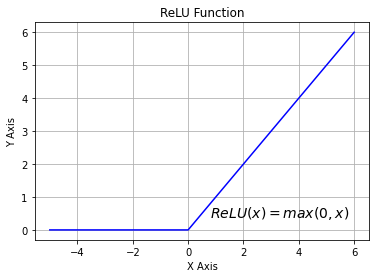

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-5, 6, 100)
plt.plot(X, ReLU(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('ReLU Function')
plt.grid()
plt.text(0.8, 0.4, r'$ReLU(x)=max(0, x)$', fontsize=14)
plt.show()

### ADDING A RUN METHOD

In [ ]:
from scipy.special import expit as activation_function
import numpy as np
from scipy.special import expit as activation_function

from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

class NeuralNetwork:
    def __init__(self,
                 no_of_in_nodes,
                 no_of_out_nodes,
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.create_weight_matrices()

    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neural network"""
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,
                                        self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes,
                                         self.no_of_hidden_nodes))
    def train(self, input_vector, target_vector):
        pass
    
    def run(self, input_vector):
        """
        running the network with an input vector 'input_vector'.
        'input_vector' can be tuple, list or ndarray
        """
        # turning the input vector into a column vector
        input_vector = np.array(input_vector, ndmin=2).T
        input_hidden = activation_function(self.weights_in_hidden@ input_vector)
        output_vector = activation_function(self.weights_hidden_out @ input_hidden)
        return output_vector


In [ ]:
simple_network = NeuralNetwork(no_of_in_nodes=2,
                               no_of_out_nodes=2,
                               no_of_hidden_nodes=4,
                               learning_rate=0.6)

In [ ]:
simple_network.run([(3, 4)])

array([[0.43502279],
       [0.44947823]])

### FOOTNOTES

# BACKPROPAGATION IN NEURAL NETWORKS

### INTRODUCTION

### BACKPROPAGATION IN DETAIL

# TRAINING A NEURAL NETWORK WITH PYTHON

### INTRODUCTION

In [ ]:
from sklearn.datasets import make_blobs

n_samples = 500
blob_centers = ([2, 6], [6, 2], [7, 7])
n_classes = len(blob_centers)
data, labels = make_blobs(n_samples=n_samples,
                          centers=blob_centers,
                          random_state=7)


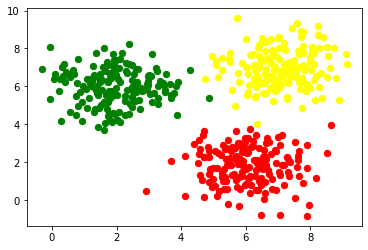

In [ ]:
import matplotlib.pyplot as plt

colours = ('green', 'red', "yellow")
fig, ax = plt.subplots()

for n_class in range(n_classes):
    ax.scatter(data[labels==n_class][:, 0],
               data[labels==n_class][:, 1],
               c=colours[n_class],
               s=40,
               label=str(n_class))
    

In [ ]:
import numpy as np
labels = np.arange(n_classes) == labels.reshape(labels.size, 1)
labels = labels.astype(np.float)
labels[:7]

/tmp/ipykernel_15664/2517291196.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = labels.astype(np.float)


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split

res = train_test_split(data, labels,
                       train_size=0.8,
                       test_size=0.2,
                       random_state=42)
train_data, test_data, train_labels, test_labels = res
train_labels[:10]


array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [ ]:
from neural_networks1 import NeuralNetwork

simple_network = NeuralNetwork(no_of_in_nodes=2,
                               no_of_out_nodes=3,
                               no_of_hidden_nodes=5,
                               learning_rate=0.3)


In [ ]:
for i in range(len(train_data)):
    simple_network.train(train_data[i], train_labels[i])
simple_network.evaluate(train_data, train_labels)

(390, 10)

### NEURAL NETWORK WITH BIAS NODES

In [ ]:
from neural_networks2 import NeuralNetwork

simple_network = NeuralNetwork(no_of_in_nodes=2,
                               no_of_out_nodes=3,
                               no_of_hidden_nodes=5,
                               learning_rate=0.1,
                               bias=1)
for i in range(len(train_data)):
    simple_network.train(train_data[i], train_labels[i])
simple_network.evaluate(train_data, train_labels)

(383, 17)

EXERCISE

We created in the chapter "Data Creation" a file strange_flowers.txt in the folder data . Create a

Neural Network to classify the 'flowers':

The data looks like this:

0.000,240.000,100.000,3.020

253.000,99.000,13.000,3.875

202.000,107.000,6.000,4.1

186.000,84.000,6.000,4.068

0.000,244.000,103.000,3.386

0.000,246.000,98.000,2.955

241.000,103.000,3.000,4.049

236.000,104.000,12.000,3.087

244.000,109.000,1.000,3.111

253.000,97.000,8.000,3.752

231.000,92.000,1.000,3.488

0.000,250.000,103.000,3.379


SOLUTION:

In [ ]:
c = np.loadtxt("data/strange_flowers.txt", delimiter=" ")
data = c[:, :-1]
n_classes = data.shape[1]
labels = c[:, -1]
data[:5]

array([[247.  , 113.  ,   4.  ,   3.79],
       [253.  , 112.  ,   5.  ,   4.09],
       [242.  , 112.  ,   1.  ,   3.64],
       [238.  , 105.  ,  11.  ,   3.58],
       [242.  , 101.  ,   9.  ,   4.12]])

In [ ]:
labels = np.arange(n_classes) == labels.reshape(labels.size, 1)
labels = labels.astype(np.float)
labels[:3]

/tmp/ipykernel_15664/3993681641.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = labels.astype(np.float)


array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
from sklearn import preprocessing
data = preprocessing.scale(data)
data[:5]
data.shape
labels.shape

(795, 4)

In [ ]:
from sklearn.model_selection import train_test_split
res = train_test_split(data, labels,
train_size=0.8,
test_size=0.2,
random_state=42)
train_data, test_data, train_labels, test_labels = res
train_labels[:10]

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [ ]:
from neural_networks2 import NeuralNetwork

simple_network = NeuralNetwork(no_of_in_nodes=4,
                               no_of_out_nodes=4,
                               no_of_hidden_nodes=20,
                               learning_rate=0.3)
for i in range(len(train_data)):
    simple_network.train(train_data[i], train_labels[i])
simple_network.evaluate(train_data, train_labels)


(487, 149)

# SOFTMAX AS ACTIVATION FUNCTION

### SOFTMAX

In [ ]:
import numpy as np

def softmax(x):
    """ applies softmax to an input x"""
    e_x = np.exp(x)
    return e_x / e_x.sum()

x = np.array([1, 0, 3, 5])
y = softmax(x)
y, x / x.sum()


(array([0.01578405, 0.00580663, 0.11662925, 0.86178007]),
 array([0.11111111, 0.        , 0.33333333, 0.55555556]))

In [ ]:
import numpy as np

def softmax(x):
    """ applies softmax to an input x"""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

softmax(x)


array([0.01578405, 0.00580663, 0.11662925, 0.86178007])

### DERIVATE OF SOFTMAX FUNCTION

In [ ]:
import numpy as np

def softmax(x):
    e_x = np.exp(x)
    return e_x / e_x.sum()

s = softmax(np.array([0, 4, 5]))
si_sj = - s * s.reshape(3, 1)

print(s)
print(si_sj)
s_der = np.diag(s) + si_sj
s_der

[0.00490169 0.26762315 0.72747516]
[[-2.40265555e-05 -1.31180548e-03 -3.56585701e-03]
 [-1.31180548e-03 -7.16221526e-02 -1.94689196e-01]
 [-3.56585701e-03 -1.94689196e-01 -5.29220104e-01]]


array([[ 0.00487766, -0.00131181, -0.00356586],
       [-0.00131181,  0.196001  , -0.1946892 ],
       [-0.00356586, -0.1946892 ,  0.19825505]])

In [ ]:
from sklearn.datasets import make_blobs

n_samples = 300
samples, labels = make_blobs(n_samples=n_samples,
                             centers=([2, 6], [6, 2]),
                             random_state=0)


In /home/tsanga/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tsanga/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tsanga/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/tsanga/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tsanga/anaconda3/lib/python3.9/site-packages/matplo

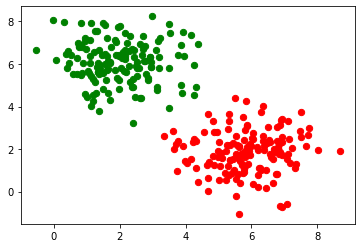

In [ ]:
import matplotlib.pyplot as plt

colours = ('green', 'red', 'blue', 'magenta', 'yellow', 'cyan')
fig, ax = plt.subplots()

for n_class in range(2):
    ax.scatter(samples[labels==n_class][:, 0], samples[labels==n_class][:, 1],
               c=colours[n_class], s=40, label=str(n_class))
size_of_learn_sample = int(n_samples * 0.8)
learn_data = samples[:size_of_learn_sample]
test_data = samples[-size_of_learn_sample:]


In [ ]:
from neural_networks_softmax import NeuralNetwork

simple_network = NeuralNetwork(no_of_in_nodes=2,
                               no_of_out_nodes=2,
                               no_of_hidden_nodes=5,
                               learning_rate=0.3,
                               softmax=True)


In [ ]:
for x in [(1, 4), (2, 6), (3, 3), (6, 2)]:
    y = simple_network.run(x)
    print(x, y, s.sum())


(1, 4) [[0.6236119]
 [0.3763881]] 1.0
(2, 6) [[0.62055656]
 [0.37944344]] 1.0
(3, 3) [[0.59076232]
 [0.40923768]] 1.0
(6, 2) [[0.55570763]
 [0.44429237]] 1.0


In [ ]:
labels_one_hot = (np.arange(2) == labels.reshape(labels.size, 1))
labels_one_hot = labels_one_hot.astype(np.float)

for i in range(size_of_learn_sample):
    #print(learn_data[i], labels[i], labels_one_hot[i])
    simple_network.train(learn_data[i],
                         labels_one_hot[i])

from collections import Counter

evaluation = Counter()
simple_network.evaluate(learn_data, labels)


/tmp/ipykernel_16505/928938545.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels_one_hot = labels_one_hot.astype(np.float)


(240, 0)

### FOOTNOTES

# CONFUSION MATRIX

2-CLASS CASE

MULTI-CLASS CASE

### EXAMPLE

In [ ]:
import numpy as np

cm = np.array(
    [[5825, 1, 49, 23, 7, 46, 30, 12, 21, 26],
     [1, 6654, 48, 25, 10, 32, 19, 62, 111, 10],
     [2, 20, 5561, 69, 13, 10, 2, 45, 18, 2], 
     [6, 26, 99, 5786, 5, 111,1, 41, 110, 79],
     [4, 10, 43, 6, 5533, 32, 11, 53, 34, 79],
     [3, 1, 2, 56, 0, 4954, 23, 0, 12, 5],
     [31, 4, 42, 22, 45, 103, 5806, 3, 34, 3],
     [0, 4, 30, 29, 5, 6, 0, 5817, 2, 28],
     [35, 6, 63, 58, 8, 59, 26, 13, 5394, 24],
     [16, 16, 21,57, 216, 68, 0, 219, 115, 5693]]) 


In [ ]:
def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()

def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows

def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns

print("label precision recall")
for label in range(10):
    print(f"{label:5d} {precision(label, cm):9.3f} {recall(label,cm):6.3f}")
    
    

label precision recall
    0     0.983  0.964
    1     0.987  0.954
    2     0.933  0.968
    3     0.944  0.924
    4     0.947  0.953
    5     0.914  0.980
    6     0.981  0.953
    7     0.928  0.982
    8     0.922  0.949
    9     0.957  0.887


In [ ]:
print("precision total:", precision_macro_average(cm))
print("recall total:", recall_macro_average(cm))

precision total: 0.9496885564052286
recall total: 0.9514531547877969


In [ ]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements

In [ ]:
accuracy(cm)

0.9503833333333334

# NEURAL NETWORK

### USING MNIST

### READING THE MNIST DATA SET

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

image_size = 28 # width and length
no_of_different_labels = 10 # i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
data_path = "data/mnist/"

train_data = np.loadtxt(data_path + "mnist_train.csv",
                        delimiter=",")
test_data = np.loadtxt(data_path + "mnist_test.csv",
                       delimiter=",")
test_data[:10]


In [ ]:
test_data[test_data==255]
test_data.shape

In [ ]:
fac = 0.99 / 255
train_imgs = np.asfarray(train_data[:, 1:]) * fac + 0.01
test_imgs = np.asfarray(test_data[:, 1:]) * fac + 0.01
train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])


In [ ]:
import numpy as np
lr = np.arange(10)
for label in range(10):
    one_hot = (lr==label).astype(np.int)
    print("label: ", label, " in one-hot representation: ", one_hot)


In [ ]:
lr = np.arange(no_of_different_labels)

# transform labels into one hot representation
train_labels_one_hot = (lr==train_labels).astype(np.float)
test_labels_one_hot = (lr==test_labels).astype(np.float)

# we don't want zeroes and ones in the labels neither:
train_labels_one_hot[train_labels_one_hot==0] = 0.01
train_labels_one_hot[train_labels_one_hot==1] = 0.99
test_labels_one_hot[test_labels_one_hot==0] = 0.01
test_labels_one_hot[test_labels_one_hot==1] = 0.99


In [ ]:
for i in range(10):
    img = train_imgs[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

### DUMPING THE DATA FOR FASTER RELOAD

In [ ]:
import pickle
with open("data/mnist/pickled_mnist.pkl", "bw") as fh:
    data = (train_imgs,
            test_imgs,
            train_labels,
            test_labels,
            train_labels_one_hot,
            test_labels_one_hot)
    pickle.dump(data, fh)


In [ ]:
import pickle

with open("data/mnist/pickled_mnist.pkl", "br") as fh:
    data = pickle.load(fh)

train_imgs = data[0]

test_imgs = data[1]
train_labels = data[2]
test_labels = data[3]
train_labels_one_hot = data[4]
test_labels_one_hot = data[5]
image_size = 28 # width and length
no_of_different_labels = 10 # i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size


### CLASSIFYING THE DATA

In [ ]:
import numpy as np

@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

activation_function = sigmoid
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd,
                     (upp - mean) / sd,
                     loc=mean,
                     scale=sd)

class NeuralNetwork:
    def __init__(self,
                 no_of_in_nodes,
                 no_of_out_nodes,
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.create_weight_matrices()
    def create_weight_matrices(self):
        """
        A method to initialize the weight
        matrices of the neural network
        """
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0,
                             sd=1,
                             low=-rad,
                             upp=rad)
        self.wih = X.rvs((self.no_of_hidden_nodes,
                          self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.who = X.rvs((self.no_of_out_nodes,
                          self.no_of_hidden_nodes))

    def train(self, input_vector, target_vector):
        """
        input_vector and target_vector can
        be tuple, list or ndarray
        """
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T
        output_vector1 = np.dot(self.wih,
                                input_vector)
        output_hidden = activation_function(output_vector1)
        output_vector2 = np.dot(self.who,
                                output_hidden)
        output_network = activation_function(output_vector2)
        output_errors = target_vector - output_network
        # update the weights:
        tmp = output_errors * output_network * (1.0 - output_network)
        tmp = self.learning_rate * np.dot(tmp,
                                          output_hidden.T)
        self.who += tmp
        # calculate hidden errors:
        hidden_errors = np.dot(self.who.T,
                               output_errors)
        # update the weights:
        tmp = hidden_errors * output_hidden * (1.0 - output_hidden)
        self.wih += self.learning_rate* np.dot(tmp, input_vector.T)
        
    def run(self, input_vector):
        # input_vector can be tuple, list or ndarray
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = np.dot(self.wih,
                               input_vector)
        output_vector = activation_function(output_vector)
        output_vector = np.dot(self.who,
                               output_vector)
        output_vector = activation_function(output_vector)
        return output_vector
    
    def confusion_matrix(self, data_array, labels):
        cm = np.zeros((10, 10), int)
        for i in range(len(data_array)):
            res = self.run(data_array[i])
            res_max = res.argmax()
            target = labels[i][0]
            cm[res_max, int(target)] += 1
        return cm
    
    def precision(self, label, confusion_matrix):
        col = confusion_matrix[:, label]
        return confusion_matrix[label, label] / col.sum()
    
    def recall(self, label, confusion_matrix):
        row = confusion_matrix[label, :]
        return confusion_matrix[label, label] / row.sum()
    
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs


In [ ]:
ANN = NeuralNetwork(no_of_in_nodes = image_pixels,
                    no_of_out_nodes = 10,
                    no_of_hidden_nodes = 100,
                    learning_rate = 0.1)

for i in range(len(train_imgs)):
    ANN.train(train_imgs[i], train_labels_one_hot[i])
    

NameError: name 'image_pixels' is not defined

In [ ]:
for i in range(20):
    res = ANN.run(test_imgs[i])
    print(test_labels[i], np.argmax(res), np.max(res))

In [ ]:
corrects, wrongs = ANN.evaluate(train_imgs, train_labels)
print("accuracy train: ", corrects / ( corrects + wrongs))
corrects, wrongs = ANN.evaluate(test_imgs, test_labels)
print("accuracy: test", corrects / ( corrects + wrongs))
cm = ANN.confusion_matrix(train_imgs, train_labels)
print(cm)

for i in range(10):
    print("digit: ", i, "precision: ", ANN.precision(i, cm), "recall: ", ANN.recall(i, cm))


# MULTIPLE RUNS

In [ ]:
epochs = 3
NN = NeuralNetwork(no_of_in_nodes = image_pixels,
                   no_of_out_nodes = 10,
                   no_of_hidden_nodes = 100,
                   learning_rate = 0.1)

for epoch in range(epochs):
    print("epoch: ", epoch)
    for i in range(len(train_imgs)):
        NN.train(train_imgs[i],
                 train_labels_one_hot[i])
    corrects, wrongs = NN.evaluate(train_imgs, train_labels)
    print("accuracy train: ", corrects / ( corrects + wrongs))
    corrects, wrongs = NN.evaluate(test_imgs, test_labels)
    print("accuracy: test", corrects / ( corrects + wrongs))


In [ ]:
import numpy as np

@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
activation_function = sigmoid

from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd,
                     (upp - mean) / sd,
                     loc=mean,
                     scale=sd)

class NeuralNetwork:
    def __init__(self,
        no_of_in_nodes,
        no_of_out_nodes,
        no_of_hidden_nodes,
        learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.create_weight_matrices()

    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neur
        al network"""
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0,
                             sd=1,
                             low=-rad,
                             upp=rad)
        self.wih = X.rvs((self.no_of_hidden_nodes,
                          self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0,
                             sd=1,
                             low=-rad,
                             upp=rad)
        self.who = X.rvs((self.no_of_out_nodes,
                          self.no_of_hidden_nodes))

    def train_single(self, input_vector, target_vector):
        """
        input_vector and target_vector can be tuple,
        list or ndarray
        """
        output_vectors = []
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T
        output_vector1 = np.dot(self.wih,
                                input_vector)
        output_hidden = activation_function(output_vector1)
        output_vector2 = np.dot(self.who,
                                output_hidden)
        output_network = activation_function(output_vector2)
        output_errors = target_vector - output_network
        # update the weights:
        tmp = output_errors * output_network * (1.0 - output_network)
        tmp = self.learning_rate * np.dot(tmp,
                                          output_hidden.T)
        self.who += tmp
        # calculate hidden errors:
        hidden_errors = np.dot(self.who.T,
                               output_errors)
        # update the weights:
        tmp = hidden_errors * output_hidden * (1.0 - output_hidden)
        self.wih += self.learning_rate * np.dot(tmp, input_vector.T)

    def train(self, data_array,
              labels_one_hot_array,
              epochs=1,
              intermediate_results=False):
        intermediate_weights = []
        for epoch in range(epochs):
            print("*", end="")
            for i in range(len(data_array)):
                self.train_single(data_array[i],
                                  labels_one_hot_array[i])
                if intermediate_results:
                    intermediate_weights.append((self.wih.copy(),
                                                 self.who.copy()))
            return intermediate_weights

    def confusion_matrix(self, data_array, labels):
        cm = {}
        for i in range(len(data_array)):
            res = self.run(data_array[i])
            res_max = res.argmax()
            target = labels[i][0]
            if (target, res_max) in cm:
                cm[(target, res_max)] += 1
            else:
                cm[(target, res_max)] = 1
        return cm
    
    def run(self, input_vector):
        """ input_vector can be tuple, list or ndarray """
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = np.dot(self.wih,
                               input_vector)
        output_vector = activation_function(output_vector)
        output_vector = np.dot(self.who,
                               output_vector)
        output_vector = activation_function(output_vector)
        return output_vector

    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs
    



In [ ]:
epochs = 10

ANN = NeuralNetwork(no_of_in_nodes = image_pixels,
                    no_of_out_nodes = 10,
                    no_of_hidden_nodes = 100,
                    learning_rate = 0.15)

weights = ANN.train(train_imgs,
                    train_labels_one_hot,
                    epochs=epochs,
                    intermediate_results=True)


In [ ]:
cm = ANN.confusion_matrix(train_imgs, train_labels)
print(ANN.run(train_imgs[i]))

In [ ]:
cm = list(cm.items())
print(sorted(cm))

In [ ]:
for i in range(epochs):
    print("epoch: ", i)
    ANN.wih = weights[i][0]
    ANN.who = weights[i][1]
    
    corrects, wrongs = ANN.evaluate(train_imgs, train_labels)
    print("accuracy train: ", corrects / ( corrects + wrongs))
    corrects, wrongs = ANN.evaluate(test_imgs, test_labels)
    print("accuracy: test", corrects / ( corrects + wrongs))

# WITH BIAS NODES

In [ ]:
import numpy as np

@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

activation_function = sigmoid

from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd,
                     (upp - mean) / sd,
                     loc=mean,
                     scale=sd)

class NeuralNetwork:
    def __init__(self,
                 no_of_in_nodes,
                 no_of_out_nodes,
                 no_of_hidden_nodes,
                 learning_rate,
                 bias=None):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.bias = bias
        self.create_weight_matrices()
    def create_weight_matrices(self):
        """
        A method to initialize the weight
        matrices of the neural network with
        optional bias nodes
        """
        bias_node = 1 if self.bias else 0
        rad = 1 / np.sqrt(self.no_of_in_nodes + bias_node)
        X = truncated_normal(mean=0,
                             sd=1,
                             low=-rad,
                             upp=rad)
        self.wih = X.rvs((self.no_of_hidden_nodes,
                          self.no_of_in_nodes + bias_node))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.who = X.rvs((self.no_of_out_nodes,
                          self.no_of_hidden_nodes + bias_node))

    def train(self, input_vector, target_vector):
        """
        input_vector and target_vector can
        be tuple, list or ndarray
        """
        bias_node = 1 if self.bias else 0
        
        if self.bias:
            # adding bias node to the end of the inpuy_vector
            input_vector = np.concatenate((input_vector,
                                       [self.bias]) )
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T
        output_vector1 = np.dot(self.wih,
                                input_vector)
        output_hidden = activation_function(output_vector1)

        if self.bias:
            output_hidden = np.concatenate((output_hidden,
                                        [[self.bias]]) )
        output_vector2 = np.dot(self.who,
                                output_hidden)
        output_network = activation_function(output_vector2)
        output_errors = target_vector - output_network
        # update the weights:
        tmp = output_errors * output_network * (1.0 - output_network)
        tmp = self.learning_rate
        self.who += tmp* np.dot(tmp, output_hidden.T)
        # calculate hidden errors:
        hidden_errors = np.dot(self.who.T,
                               output_errors)
        # update the weights:
        tmp = hidden_errors * output_hidden * (1.0 - output_hidden)
        if self.bias:
            x = np.dot(tmp, input_vector.T)[:-1,:]
        else:
            x = np.dot(tmp, input_vector.T)
        
        self.wih += self.learning_rate * x
    
    def run(self, input_vector):
        """
        input_vector can be tuple, list or ndarray
        """
        if self.bias:
            # adding bias node to the end of the inpuy_vector
            input_vector = np.concatenate((input_vector, [1]) )
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = np.dot(self.wih,
                               input_vector)
        output_vector = activation_function(output_vector)

        if self.bias:
            output_vector = np.concatenate( (output_vector,[[1]]) )
        output_vector = np.dot(self.who,
                               output_vector)
        output_vector = activation_function(output_vector)
        return output_vector

        def evaluate(self, data, labels):
            corrects, wrongs = 0, 0
            for i in range(len(data)):
                res = self.run(data[i])
                res_max = res.argmax()
                if res_max == labels[i]:
                    corrects += 1
                else:
                    wrongs += 1
            return corrects, wrongs


In [ ]:
ANN = NeuralNetwork(no_of_in_nodes=image_pixels,
                    no_of_out_nodes=10,
                    no_of_hidden_nodes=200,
                    learning_rate=0.1,
                    bias=None)

for i in range(len(train_imgs)):
    ANN.train(train_imgs[i], train_labels_one_hot[i])

for i in range(20):
    res = ANN.run(test_imgs[i])
    print(test_labels[i], np.argmax(res), np.max(res))



In [ ]:
corrects, wrongs = ANN.evaluate(train_imgs, train_labels)
print("accuracy train: ", corrects / ( corrects + wrongs))
corrects, wrongs = ANN.evaluate(test_imgs, test_labels)
print("accuracy: test", corrects / ( corrects + wrongs))

# VERSION WITH BIAS AND EPOCHS:

In [ ]:
import numpy as np

@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

activation_function = sigmoid
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd,(upp - mean) / sd,
                     loc=mean,
                     scale=sd)
class NeuralNetwork:
    def __init__(self,
                 no_of_in_nodes,
                 no_of_out_nodes,
                 no_of_hidden_nodes,
                 learning_rate,
                 bias=None):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.bias = bias
        self.create_weight_matrices()

    def create_weight_matrices(self):
        """
        A method to initialize the weight matrices
        of the neural network with optional
        bias nodes"""
        bias_node = 1 if self.bias else 0
        rad = 1 / np.sqrt(self.no_of_in_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.wih = X.rvs((self.no_of_hidden_nodes,
                          self.no_of_in_nodes + bias_node))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes + bias_node)
        X = truncated_normal(mean=0,
                             sd=1,
                             low=-rad,
                             upp=rad)
        self.who = X.rvs((self.no_of_out_nodes,
                          self.no_of_hidden_nodes + bias_node))
                  
    def train_single(self, input_vector, target_vector):
        """
        input_vector and target_vector can be tuple,
        list or ndarray
        """
        bias_node = 1 if self.bias else 0
        if self.bias:
            # adding bias node to the end of the inpuy_vector
            input_vector = np.concatenate( (input_vector,
                                            [self.bias]) )
        
        output_vectors = []
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T
        output_vector1 = np.dot(self.wih,
                                input_vector)
        output_hidden = activation_function(output_vector1)

        if self.bias:
        output_hidden = np.concatenate((output_hidden,
                                        [[self.bias]]) )
        output_vector2 = np.dot(self.who,
                                output_hidden)
        output_network = activation_function(output_vector2)
        output_errors = target_vector - output_network
        # update the weights:
        tmp = output_errors * output_network * (1.0 - output_network)
        tmp = self.learning_rate* np.dot(tmp,
                                         output_hidden.T)
        self.who += tmp
        # calculate hidden errors:
        hidden_errors = np.dot(self.who.T,
                               output_errors)
        # update the weights:
        tmp = hidden_errors * output_hidden * (1.0 - output_hidden)
        if self.bias:
            x = np.dot(tmp, input_vector.T)[:-1,:]
        else:
            x = np.dot(tmp, input_vector.T)
        self.wih += self.learning_rate * x

    def train(self, data_array,
              labels_one_hot_array,
              epochs=1,
              intermediate_results=False):
        intermediate_weights = []
        for epoch in range(epochs):
            for i in range(len(data_array)):
                self.train_single(data_array[i],
                                  labels_one_hot_array[i])
                if intermediate_results:
                    intermediate_weights.append((self.wih.copy(),
                                                 self.who.copy()))
            return intermediate_weights
    
    def run(self, input_vector):
        # input_vector can be tuple, list or ndarray
        if self.bias:
        # adding bias node to the end of the inpuy_vector
        input_vector = np.concatenate( (input_vector,
                                        [self.bias]) )
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = np.dot(self.wih,
                               input_vector)
        output_vector = activation_function(output_vector)

        if self.bias:
            output_vector = np.concatenate((output_vector,
                                             [[self.bias]]))
        output_vector = np.dot(self.who,
                               output_vector)
        output_vector = activation_function(output_vector)
        return output_vector

    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs
    




In [ ]:
epochs = 12
network = NeuralNetwork(no_of_in_nodes=image_pixels,
                        no_of_out_nodes=10,
                        no_of_hidden_nodes=100,
                        learning_rate=0.1,
                        bias=None)

weights = network.train(train_imgs,
                        train_labels_one_hot,
                        epochs=epochs,
                        intermediate_results=True)

for epoch in range(epochs):
    print("epoch: ", epoch)
    network.wih = weights[epoch][0]
    network.who = weights[epoch][1]
    corrects, wrongs = network.evaluate(train_imgs,
                                        train_labels)
    print("accuracy train: ", corrects / ( corrects + wrongs))
    corrects, wrongs = network.evaluate(test_imgs,
                                        test_labels)
    print("accuracy test: ", corrects / ( corrects + wrongs))
    

In [ ]:
epochs = 12
with open("nist_tests.csv", "w") as fh_out:
    for hidden_nodes in [20, 50, 100, 120, 150]:
        for learning_rate in [0.01, 0.05, 0.1, 0.2]:
            for bias in [None, 0.5]:
                network = NeuralNetwork(no_of_in_nodes=image_pixels,
                                        no_of_out_nodes=10,
                                        no_of_hidden_nodes=hidden_nodes,
                                        learning_rate=learning_rate,
                                        bias=bias)
                weights = network.train(train_imgs,
                                        train_labels_one_hot,
                                        epochs=epochs,
                                        intermediate_results=True)
                
                for epoch in range(epochs):
                    print("*", end="")
                    network.wih = weights[epoch][0]
                    network.who = weights[epoch][1]
                    train_corrects, train_wrongs = network.evaluate(train_imgs,train_labels)
                    test_corrects, test_wrongs = network.evaluate(test_imgs,test_labels)
                    outstr = str(hidden_nodes) + " " + str(learning_rate) + " " + str(bias)
                    outstr += " " + str(epoch) + " "
                    outstr += str(train_corrects / (train_corrects + train_wrongs)) + " "
                    outstr += str(train_wrongs / (train_corrects+ train_wrongs)) + " "
                    outstr += str(test_corrects / (test_corrects+ test_wrongs)) + " "
                    outstr += str(test_wrongs / (test_corrects + test_wrongs))
                    fh_out.write(outstr + "\n" )
                    fh_out.flush()


# NETWORKS WITH MULTIPLE HIDDEN LAYERS

In [ ]:

import numpy as np
from scipy.special import expit as activation_function
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd,
                     (upp - mean) / sd,
                     loc=mean,
                     scale=sd)

class NeuralNetwork:
    def __init__(self,
                 network_structure, # ie. [input_nodes, hidden1_nodes, ... , hidden_n_nodes, output_nodes]
                 learning_rate,
                 bias=None
                ):
        self.structure = network_structure
        self.learning_rate = learning_rate
        self.bias = bias
        self.create_weight_matrices()

    def create_weight_matrices(self):
        bias_node = 1 if self.bias else 0
        self.weights_matrices = []
        layer_index = 1
        no_of_layers = len(self.structure)
        while layer_index < no_of_layers:
            nodes_in = self.structure[layer_index-1]
            nodes_out = self.structure[layer_index]
            n = (nodes_in + bias_node) * nodes_out
            rad = 1 / np.sqrt(nodes_in)
            X = truncated_normal(mean=2,
                                 sd=1,
                                 low=-rad,
                                 upp=rad)
            wm = X.rvs(n).reshape((nodes_out, nodes_in + bias_node))
            self.weights_matrices.append(wm)
            layer_index += 1
    
    def train(self, input_vector, target_vector):
        """
        input_vector and target_vector can be tuple,
        list or ndarray
        """
        no_of_layers = len(self.structure)
        input_vector = np.array(input_vector, ndmin=2).T
        layer_index = 0
        # The output/input vectors of the various layers:
        res_vectors = [input_vector]
        while layer_index < no_of_layers - 1:
            in_vector = res_vectors[-1]
            if self.bias:
            # adding bias node to the end of the 'input'_vector
            in_vector = np.concatenate( (in_vector,
                                         [[self.bias]]) )
            res_vectors[-1] = in_vector
            x = np.dot(self.weights_matrices[layer_index],
                       in_vector)
            out_vector = activation_function(x)
            # the output of one layer is the input of the next one:
            res_vectors.append(out_vector)
            layer_index += 1
        layer_index = no_of_layers - 1
        target_vector = np.array(target_vector, ndmin=2).T
        output_errors = target_vector - out_vector

        while layer_index > 0:
            out_vector = res_vectors[layer_index]
            in_vector = res_vectors[layer_index-1]
            if self.bias and not layer_index==(no_of_layers-1):
                out_vector = out_vector[:-1,:].copy()
            tmp = output_errors * out_vector * (1.0 - out_vector)
            tmp = np.dot(tmp, in_vector.T)
            #if self.bias:
            tmp = tmp[:-1,:]
            self.weights_matrices[layer_index-1] += self.learning_rate * tmp
            output_errors = np.dot(self.weights_matrices[layer_index-1].T, output_errors)
            if self.bias:
                output_errors = output_errors[:-1,:]
            layer_index -= 1
    def run(self, input_vector):
        # input_vector can be tuple, list or ndarray
        no_of_layers = len(self.structure)
        if self.bias:
            # adding bias node to the end of the inpuy_vector
            input_vector = np.concatenate( (input_vector,
                                            [self.bias]) )
        in_vector = np.array(input_vector, ndmin=2).T
        layer_index = 1
        # The input vectors to the various layers
        while layer_index < no_of_layers:
            x = np.dot(self.weights_matrices[layer_index-1], in_vector)
            out_vector = activation_function(x)
            # input vector for next layer
            in_vector = out_vector
            if self.bias:
                in_vector = np.concatenate( (in_vector,
                                             [[self.bias]]))
            layer_index += 1
        return out_vector

    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs

    

In [ ]:
ANN = NeuralNetwork(network_structure=[image_pixels, 50, 50, 10],
                    learning_rate=0.1,
                    bias=None)

for i in range(len(train_imgs)):
    ANN.train(train_imgs[i], train_labels_one_hot[i])


In [ ]:
corrects, wrongs = ANN.evaluate(train_imgs, train_labels)
print("accuracy train: ", corrects / ( corrects + wrongs))
corrects, wrongs = ANN.evaluate(test_imgs, test_labels)
print("accuracy: test", corrects / ( corrects + wrongs))


# NETWORKS WITH MULTIPLE HIDDEN LAYERS AND EPOCHS

In [ ]:
import numpy as np
from scipy.special import expit as activation_function
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd,
                     (upp - mean) / sd,
                     loc=mean,
                     scale=sd)

class NeuralNetwork:
    def __init__(self,
                 network_structure, # ie. [input_nodes, hidden1_nodes, ... , hidden_n_nodes, output_nodes]
                 learning_rate,
                 bias=None
                ):
        self.structure = network_structure
        self.learning_rate = learning_rate
        self.bias = bias
        self.create_weight_matrices()
    
    def create_weight_matrices(self):
        X = truncated_normal(mean=2, sd=1, low=-0.5, upp=0.5)
        bias_node = 1 if self.bias else 0
        self.weights_matrices = []
        layer_index = 1
        no_of_layers = len(self.structure)
        while layer_index < no_of_layers:
            nodes_in = self.structure[layer_index-1]
            nodes_out = self.structure[layer_index]
            n = (nodes_in + bias_node) * nodes_out
            rad = 1 / np.sqrt(nodes_in)
            X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
            wm = X.rvs(n).reshape((nodes_out, nodes_in + bias_node))
            self.weights_matrices.append(wm)
            layer_index += 1
    
    def train_single(self, input_vector, target_vector):
        # input_vector and target_vector can be tuple, list or ndarray
        no_of_layers = len(self.structure)
        input_vector = np.array(input_vector, ndmin=2).T
        layer_index = 0
        # The output/input vectors of the various layers:
        res_vectors = [input_vector]
        while layer_index < no_of_layers - 1:
            in_vector = res_vectors[-1]
            if self.bias:
                # adding bias node to the end of the 'input'_vector
                in_vector = np.concatenate( (in_vector,
                                             [[self.bias]]) )
                res_vectors[-1] = in_vector
                x = np.dot(self.weights_matrices[layer_index], in_vector)
                out_vector = activation_function(x)
                res_vectors.append(out_vector)
            layer_index += 1
        layer_index = no_of_layers - 1
        target_vector = np.array(target_vector, ndmin=2).T
        # The input vectors to the various layers
        output_errors = target_vector - out_vector
        
        while layer_index > 0:
            out_vector = res_vectors[layer_index]
            in_vector = res_vectors[layer_index-1]
            if self.bias and not layer_index==(no_of_layers-1):
                out_vector = out_vector[:-1,:].copy()
            tmp = output_errors * out_vector * (1.0 - out_vector)
            tmp = np.dot(tmp, in_vector.T)
            #if self.bias:
            #tmp = tmp[:-1,:]
            self.weights_matrices[layer_index-1] += self.learning_rate * tmp
            output_errors = np.dot(self.weights_matrices[layer_index-1].T,output_errors)
            if self.bias:
                output_errors = output_errors[:-1,:]
            layer_index -= 1

    def train(self, data_array,
              labels_one_hot_array,
              epochs=1,
              intermediate_results=False):
        intermediate_weights = []
        for epoch in range(epochs):
            for i in range(len(data_array)):
                self.train_single(data_array[i], labels_one_hot_array[i])
            
            if intermediate_results:
                intermediate_weights.append((self.wih.copy(),
                                             self.who.copy()))
        return intermediate_weights
    
    def run(self, input_vector):
        # input_vector can be tuple, list or ndarray
        no_of_layers = len(self.structure)
        if self.bias:
            # adding bias node to the end of the inpuy_vector
            input_vector = np.concatenate( (input_vector, [self.bias]) )
        in_vector = np.array(input_vector, ndmin=2).T
        layer_index = 1
        # The input vectors to the various layers
        while layer_index < no_of_layers:
            x = np.dot(self.weights_matrices[layer_index-1],in_vector)
            out_vector = activation_function(x)
            # input vector for next layer
            in_vector = out_vector
            if self.bias:
                in_vector = np.concatenate( (in_vector,
                                             [[self.bias]]))
            layer_index += 1
        return out_vector

    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs
    

In [ ]:
epochs = 3
ANN = NeuralNetwork(network_structure=[image_pixels, 80, 80, 10],
                    learning_rate=0.01,
                    bias=None)
ANN.train(train_imgs, train_labels_one_hot, epochs=epochs)


In [ ]:
corrects, wrongs = ANN.evaluate(train_imgs, train_labels)
print("accuracy train: ", corrects / ( corrects + wrongs))
corrects, wrongs = ANN.evaluate(test_imgs, test_labels)
print("accuracy: test", corrects / ( corrects + wrongs))

FOOTNOTES

In [ ]:
print('Premiere partie reseaux de neurones')

Premiere partie reseaux de neurones
